<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [10]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [11]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)
df.head(30)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




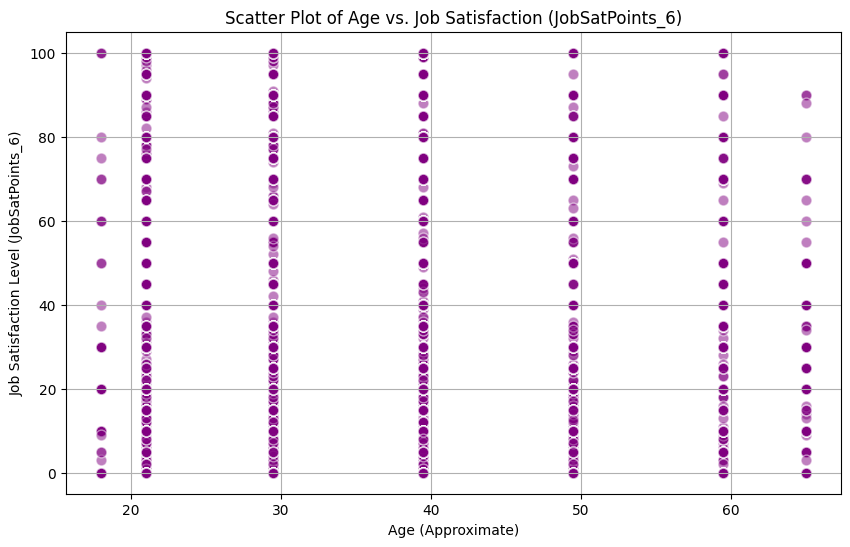

In [12]:
import re
import numpy as np
# Function to convert age ranges like '30-34 years old' to numeric midpoint
def age_to_numeric(age_str):
    nums = re.findall(r'\d+', str(age_str))
    if len(nums) == 2:
        return (int(nums[0]) + int(nums[1])) / 2
    elif len(nums) == 1:
        return int(nums[0])
    else:
        return np.nan

# Apply conversion to create a numeric age column
df['AgeNum'] = df['Age'].apply(age_to_numeric)

# Ensure JobSatPoints_6 is numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing values in these columns
df_clean = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['AgeNum'], df_clean['JobSatPoints_6'], alpha=0.5, color='purple', edgecolors='w', s=60)
plt.title('Scatter Plot of Age vs. Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Age (Approximate)')
plt.ylabel('Job Satisfaction Level (JobSatPoints_6)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


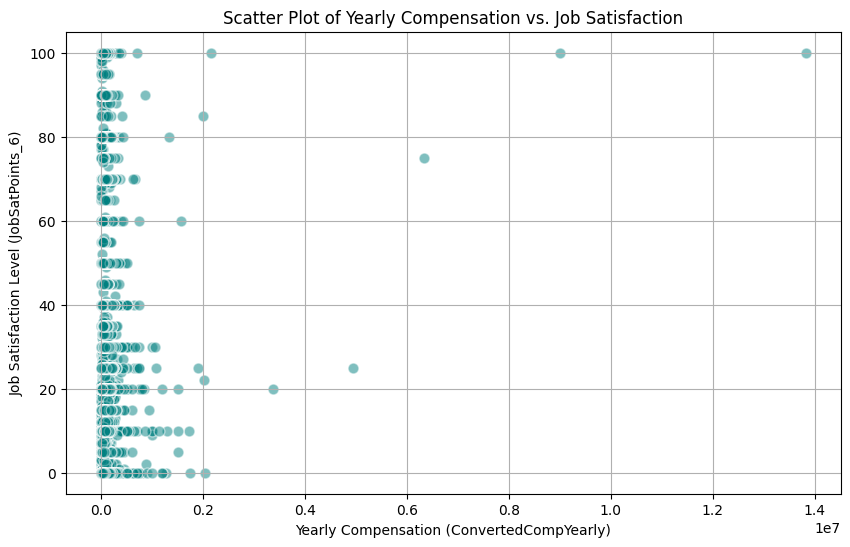

In [13]:
# Convert columns to numeric, coercing errors to NaN
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing values in these columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

plt.figure(figsize=(10, 6))
plt.scatter(
    df_clean['ConvertedCompYearly'], 
    df_clean['JobSatPoints_6'], 
    alpha=0.5, 
    color='teal', 
    edgecolors='w', 
    s=60
)
plt.title('Scatter Plot of Yearly Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction Level (JobSatPoints_6)')
plt.grid(True)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [14]:
print(df['Age'].dropna().unique()[:20]) 

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


In [15]:
def fast_age_to_num(age_str):
    if pd.isna(age_str):
        return np.nan
    parts = age_str.split(' ')
    if len(parts) == 0:
        return np.nan
    range_part = parts[0]
    if '-' in range_part:
        low, high = range_part.split('-')
        try:
            return (float(low) + float(high)) / 2
        except:
            return np.nan
    try:
        return float(range_part)
    except:
        return np.nan

# Apply without printing
df['AgeNum'] = df['Age'].apply(fast_age_to_num)

# Check how many valid values we have now
print("Count of valid AgeNum values:", df['AgeNum'].notna().sum())
print("Count of valid JobSatPoints_6 values:", df['JobSatPoints_6'].notna().sum())

# Drop NaNs only after
df_clean = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])
print("Rows after dropna:", len(df_clean))

Count of valid AgeNum values: 62547
Count of valid JobSatPoints_6 values: 29450
Rows after dropna: 29323


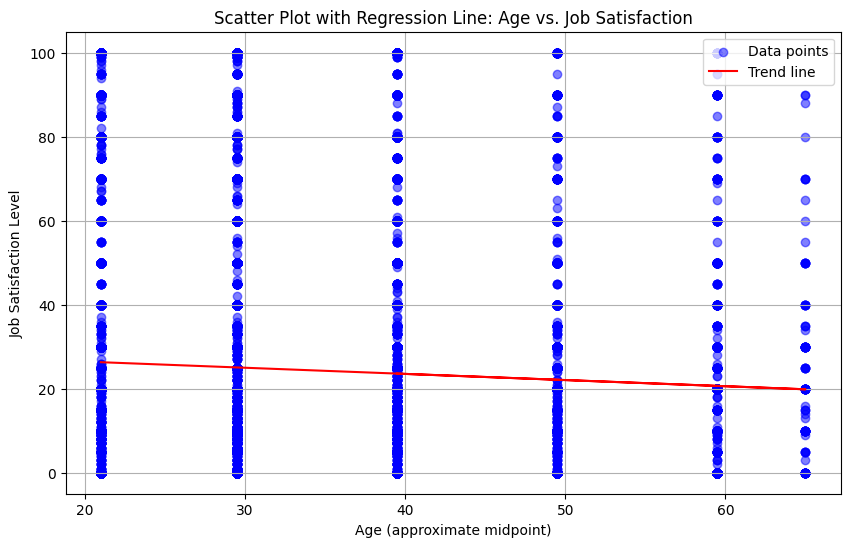

In [16]:
df['AgeNum'] = df['Age'].apply(age_to_num)

# JobSatPoints_6 is already float, but convert just to be sure
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows where either AgeNum or JobSatPoints_6 is NaN
df_clean = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])

x = df_clean['AgeNum'].values
y = df_clean['JobSatPoints_6'].values

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color='blue', label='Data points')

# Fit and plot regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label='Trend line')

plt.title('Scatter Plot with Regression Line: Age vs. Job Satisfaction')
plt.xlabel('Age (approximate midpoint)')
plt.ylabel('Job Satisfaction Level')
plt.legend()
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [17]:
def convert_age(age_str):
    if pd.isna(age_str):
        return np.nan
    try:
        parts = age_str.split(' ')[0]
        if '-' in parts:
            low, high = parts.split('-')
            return (int(low) + int(high)) / 2
        return int(parts)
    except:
        return np.nan

df['AgeNum'] = df['Age'].apply(convert_age)

In [18]:
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

In [19]:
df_clean = df.dropna(subset=['AgeNum', 'YearsCodePro'])

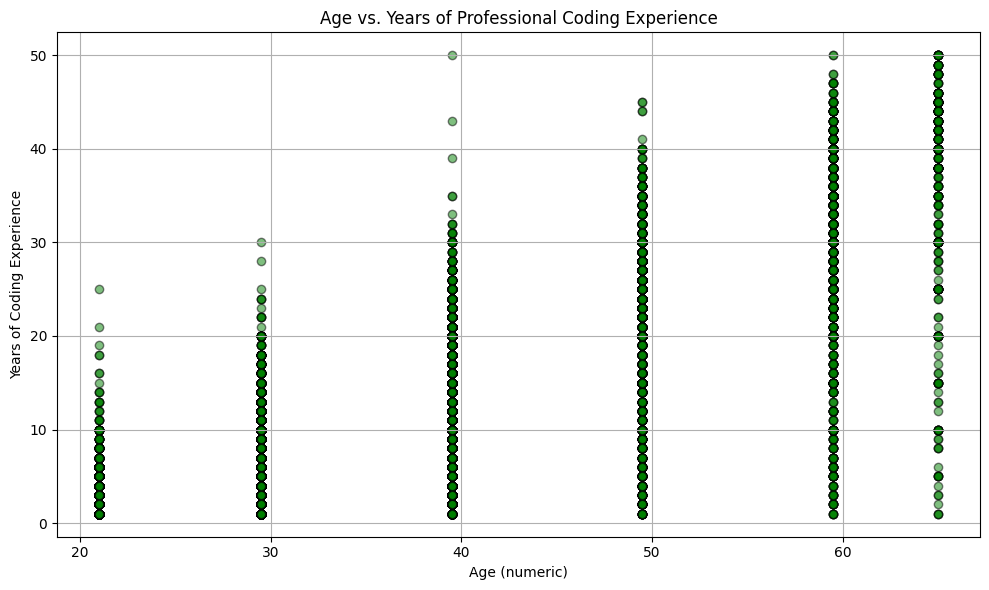

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['AgeNum'], df_clean['YearsCodePro'], alpha=0.5, color='green', edgecolors='black')
plt.title('Age vs. Years of Professional Coding Experience')
plt.xlabel('Age (numeric)')
plt.ylabel('Years of Coding Experience')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [21]:
# Convert relevant columns to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Convert Age to numeric (if not already done)
def convert_age(age_str):
    if pd.isna(age_str):
        return np.nan
    try:
        parts = age_str.split(' ')[0]
        if '-' in parts:
            low, high = parts.split('-')
            return (int(low) + int(high)) / 2
        return int(parts)
    except:
        return np.nan

df['AgeNum'] = df['Age'].apply(convert_age)

In [22]:
# Drop rows with missing data
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNum'])


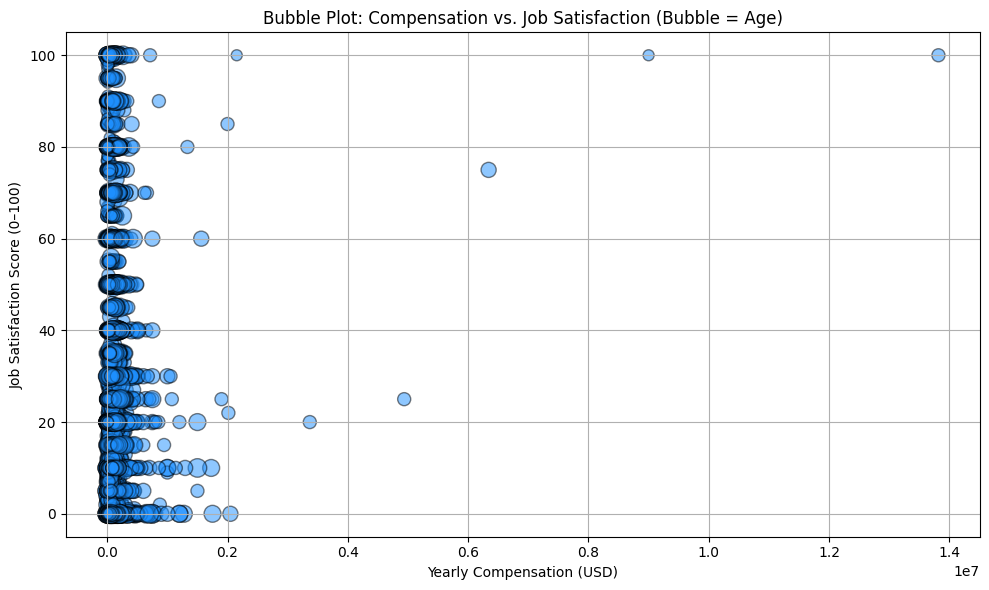

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_clean['ConvertedCompYearly'],
    df_clean['JobSatPoints_6'],
    s=df_clean['AgeNum'] * 3,   # Bubble size
    alpha=0.5,
    c='dodgerblue',
    edgecolors='black'
)

plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score (0–100)')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble = Age)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [24]:
# Ensure the JobSatPoints_6 is numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing Job Satisfaction or languages
df_lang = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6']).copy()

In [25]:
# Assume languages are separated by ";" or "," — adjust if needed
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_lang.explode('LanguageHaveWorkedWith')

# Strip spaces and clean up
df_exploded['LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.strip()


In [26]:
# Ensure the JobSatPoints_6 is numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing Job Satisfaction or languages
df_lang = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6']).copy()

In [28]:
language_sat = df_exploded.groupby('LanguageHaveWorkedWith')['JobSatPoints_6'].mean().reset_index()
language_sat = language_sat.sort_values(by='JobSatPoints_6', ascending=False)

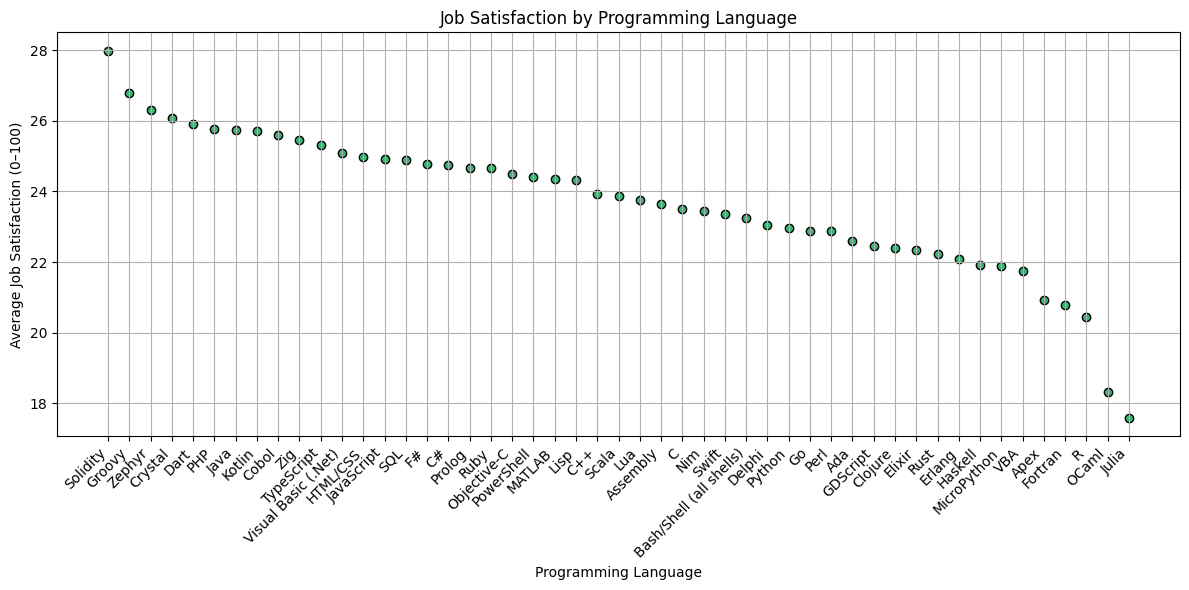

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(
    language_sat['LanguageHaveWorkedWith'],
    language_sat['JobSatPoints_6'],
    color='mediumseagreen',
    edgecolors='black'
)

plt.xticks(rotation=45, ha='right')
plt.title('Job Satisfaction by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Average Job Satisfaction (0–100)')
plt.tight_layout()
plt.grid(True)
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [30]:
# Drop rows with missing key values
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']).copy()

# Ensure numeric types
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')

# Drop rows again if numeric conversion introduced NaNs
df_clean.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'], inplace=True)

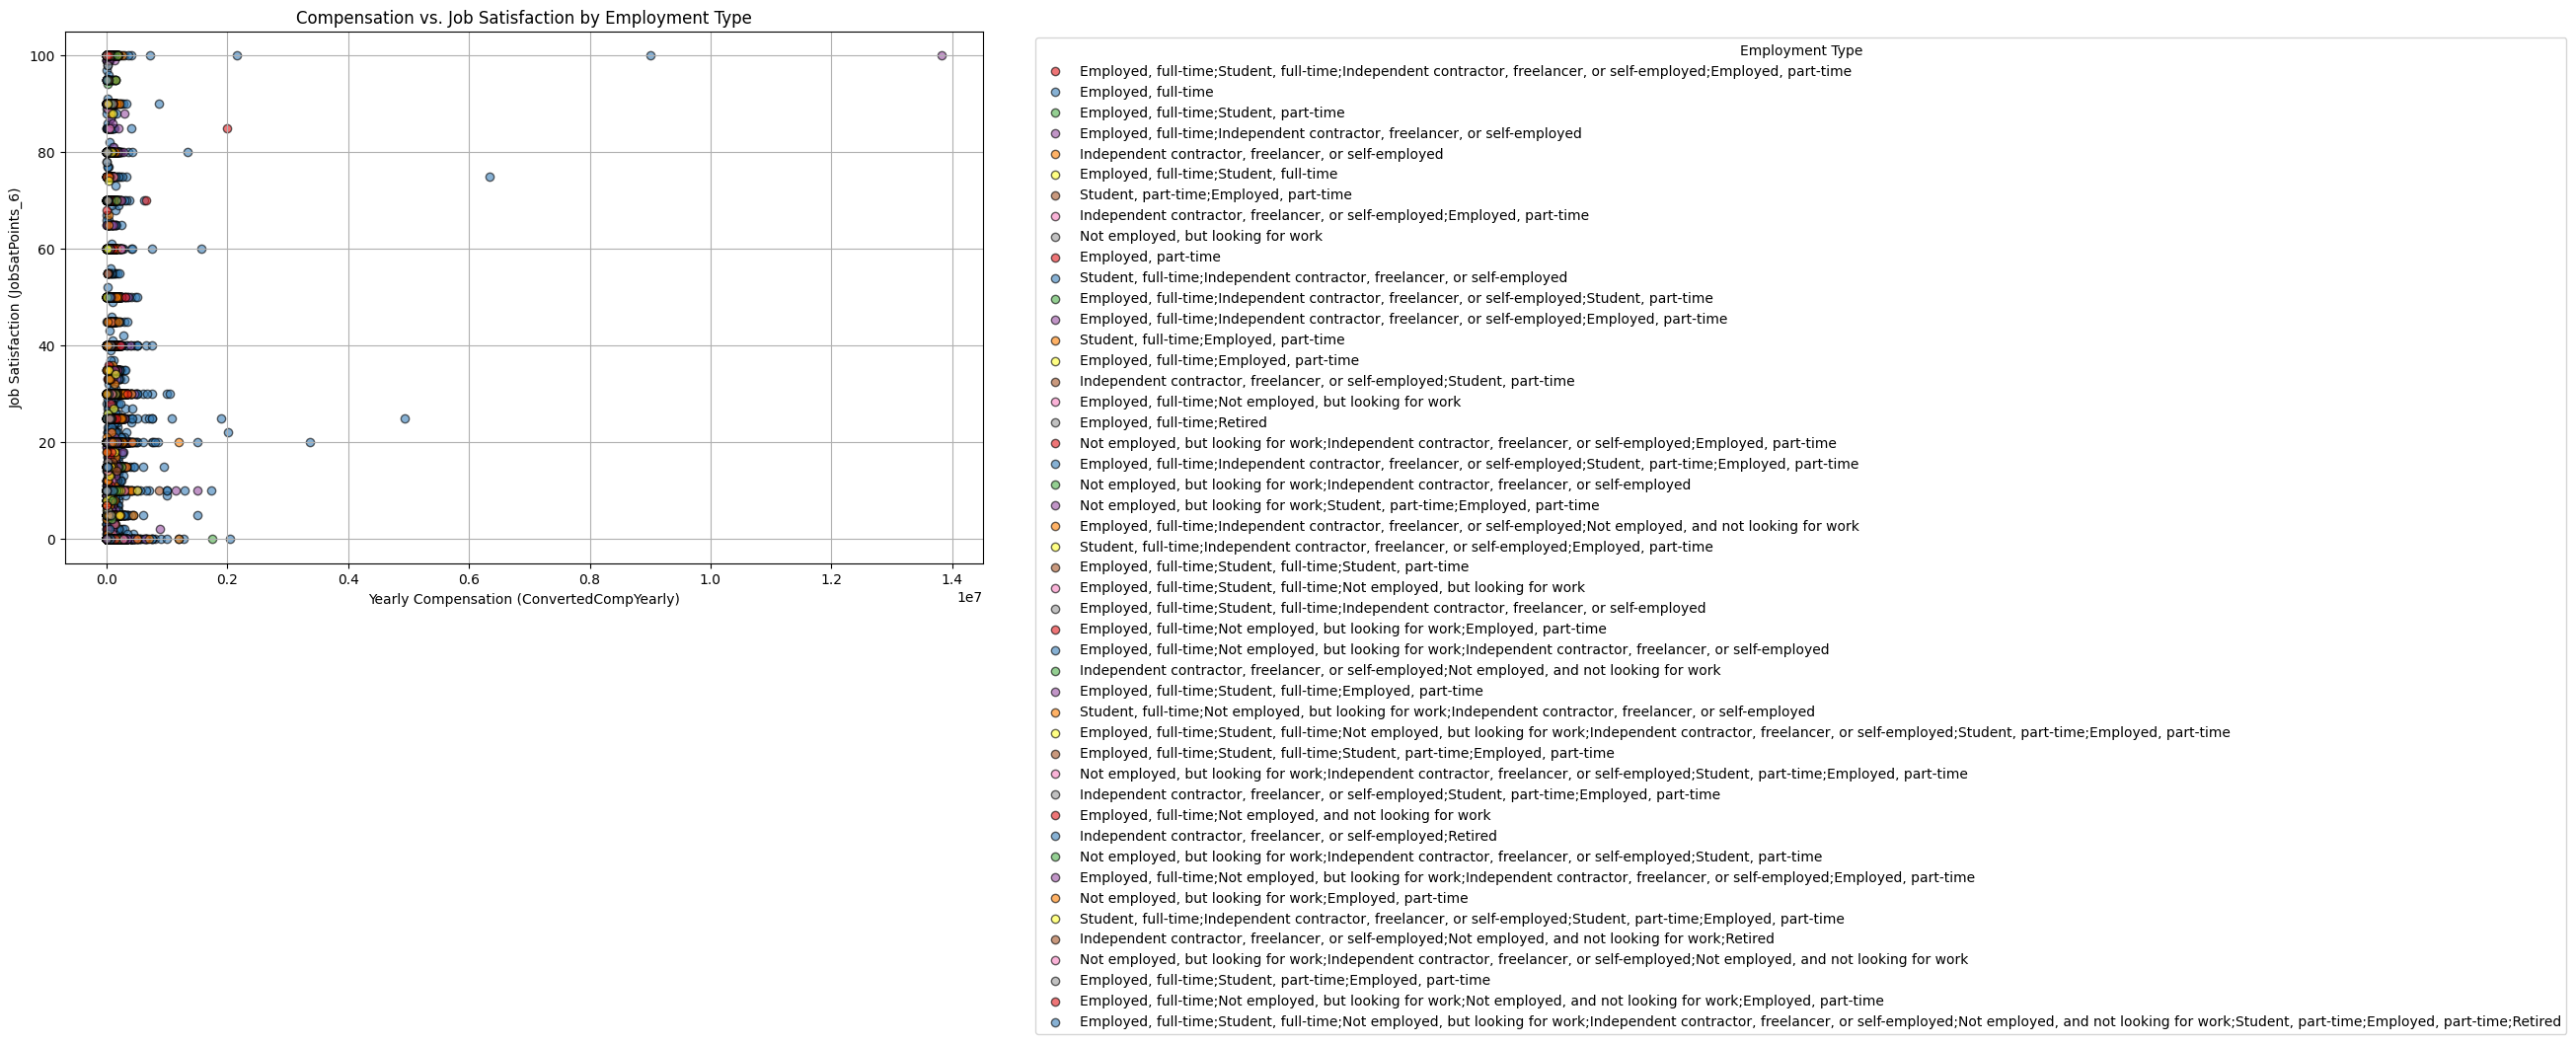

In [32]:
# Set figure
plt.figure(figsize=(12, 7))

# Unique employment types
employment_types = df_clean['Employment'].unique()

# Color map
colors = plt.cm.Set1.colors  # categorical colormap
color_map = {emp: colors[i % len(colors)] for i, emp in enumerate(employment_types)}

# Plot each group separately
for emp_type in employment_types:
    subset = df_clean[df_clean['Employment'] == emp_type]
    plt.scatter(
        subset['ConvertedCompYearly'],
        subset['JobSatPoints_6'],
        alpha=0.6,
        label=emp_type,
        edgecolors='black',
        color=color_map[emp_type]
    )

# Add titles and labels
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [35]:
# Clean data
df_clean = df.dropna(subset=['YearsCodePro', 'Age', 'Country']).copy()

# Convert YearsCodePro to numeric
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
df_clean.dropna(subset=['YearsCodePro'], inplace=True)

# Extract approximate age from 'Age' string (e.g., '35-44 years old' → 35)
df_clean['AgeApprox'] = df_clean['Age'].str.extract(r'(\d{2})').astype(float)

# Limit to top 4 countries for clarity
top_countries = df_clean['Country'].value_counts().nlargest(4).index
df_plot = df_clean[df_clean['Country'].isin(top_countries)]

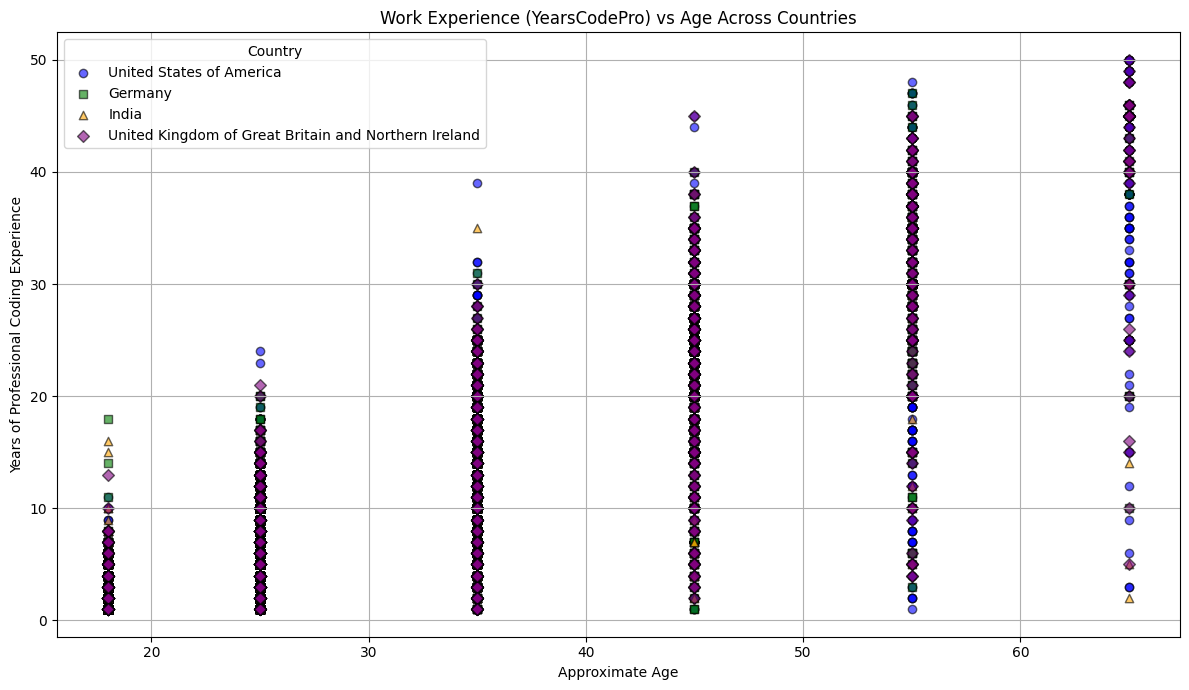

In [36]:
# Setup color & marker lists
colors = ['blue', 'green', 'orange', 'purple']
markers = ['o', 's', '^', 'D']
countries = top_countries.tolist()

plt.figure(figsize=(12, 7))

for i, country in enumerate(countries):
    subset = df_plot[df_plot['Country'] == country]
    plt.scatter(
        subset['AgeApprox'],
        subset['YearsCodePro'],
        label=country,
        color=colors[i % len(colors)],
        marker=markers[i % len(markers)],
        edgecolors='black',
        alpha=0.6
    )

plt.title("Work Experience (YearsCodePro) vs Age Across Countries")
plt.xlabel("Approximate Age")
plt.ylabel("Years of Professional Coding Experience")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


In [ ]:
 Compensation vs. Job Satisfaction
Helps identify if higher pay translates to greater satisfaction.

Trend lines may reveal saturation points or diminishing returns.
Compensation vs. Job Satisfaction by Employment Type
Using color or shape to show employment types (e.g., full-time, freelancer).

Shows how satisfaction varies not just by salary, but by work style.

Age vs. Job Satisfaction
Helps detect if younger or older developers are more content.

Adding a regression line can highlight generational patterns.
Bubble Plot: Compensation vs. Job Satisfaction (Age as Bubble Size)
Visualizes three dimensions: income, satisfaction, and age.

Big bubbles may show older developers, helping infer experience or expectations.

Years of Experience vs. Age, by Country
Shows how coding careers vary globally.

Could reveal if some countries start coding younger, or have more late-career switchers.

These plots together create a visual narrative about the lives, work preferences, and satisfaction of developers across the globe. You’re not just charting numbers — you’re telling a data-driven story about the developer experience.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
